In [15]:
import pandas as pd


# Load the datasets
vaxreg_covid = pd.read_csv('vaxreg_covid.csv')
vaxreg_covid_demog = pd.read_csv('vaxreg_covid_demog.csv')

# Display the first few rows of each dataset
vaxreg_covid_head = vaxreg_covid.head()
vaxreg_covid_demog_head = vaxreg_covid_demog.head()

vaxreg_covid_head, vaxreg_covid_demog_head


(      state        date  registrations
 0  Malaysia  2021-02-23         665856
 1  Malaysia  2021-02-24         758573
 2  Malaysia  2021-02-25         563325
 3  Malaysia  2021-02-26         408630
 4  Malaysia  2021-02-27         354525,
          date     state     sex    age  registrations
 0  2021-02-23  Malaysia  female   0-12            165
 1  2021-02-23  Malaysia  female  12-17           3238
 2  2021-02-23  Malaysia  female  18-24          76335
 3  2021-02-23  Malaysia  female  25-29          63047
 4  2021-02-23  Malaysia  female  30-34          49370)

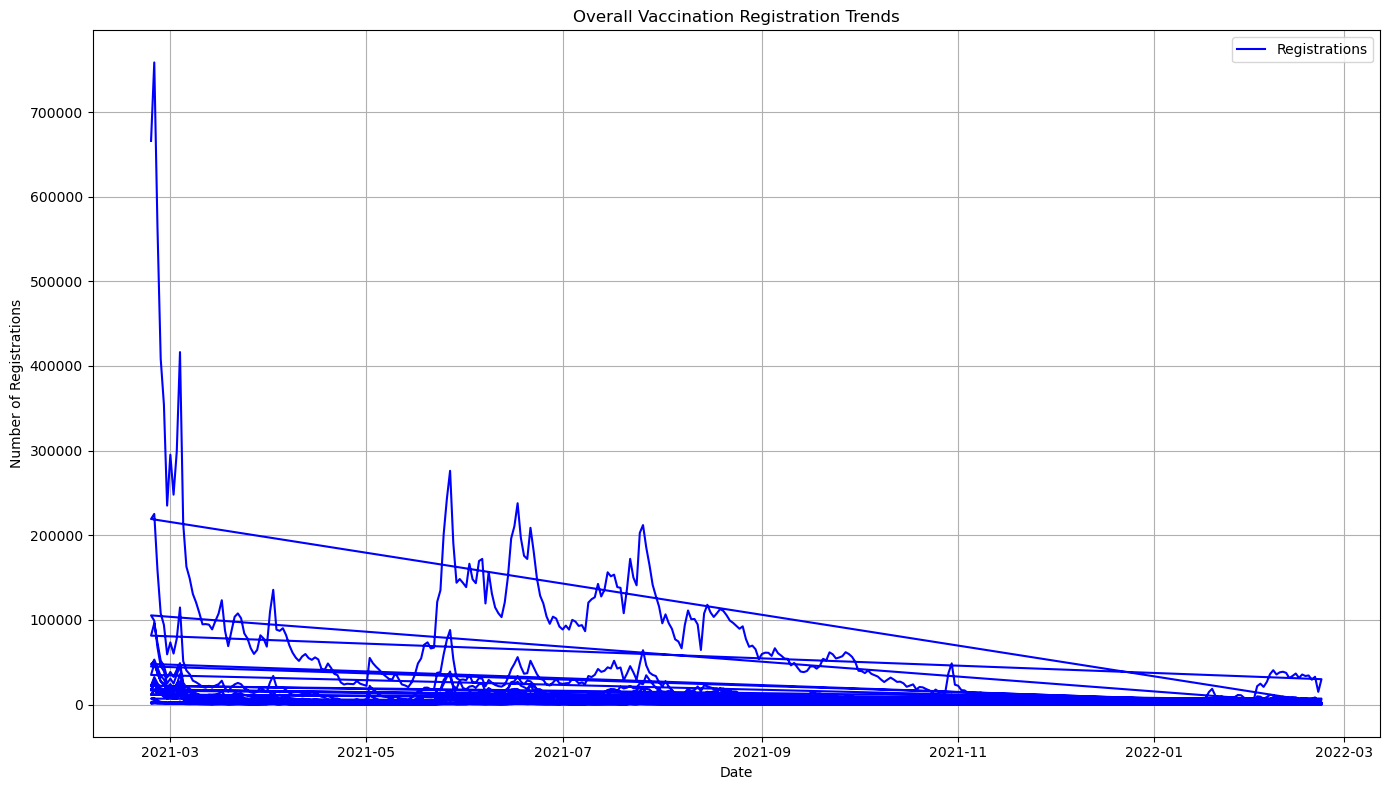

In [16]:
# Convert the date column to datetime
vaxreg_covid['date'] = pd.to_datetime(vaxreg_covid['date'])

# Plot the overall vaccination registration trends
plt.figure(figsize=(14, 8))
plt.plot(vaxreg_covid['date'], vaxreg_covid['registrations'], label='Registrations', color='b')
plt.title('Overall Vaccination Registration Trends')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()


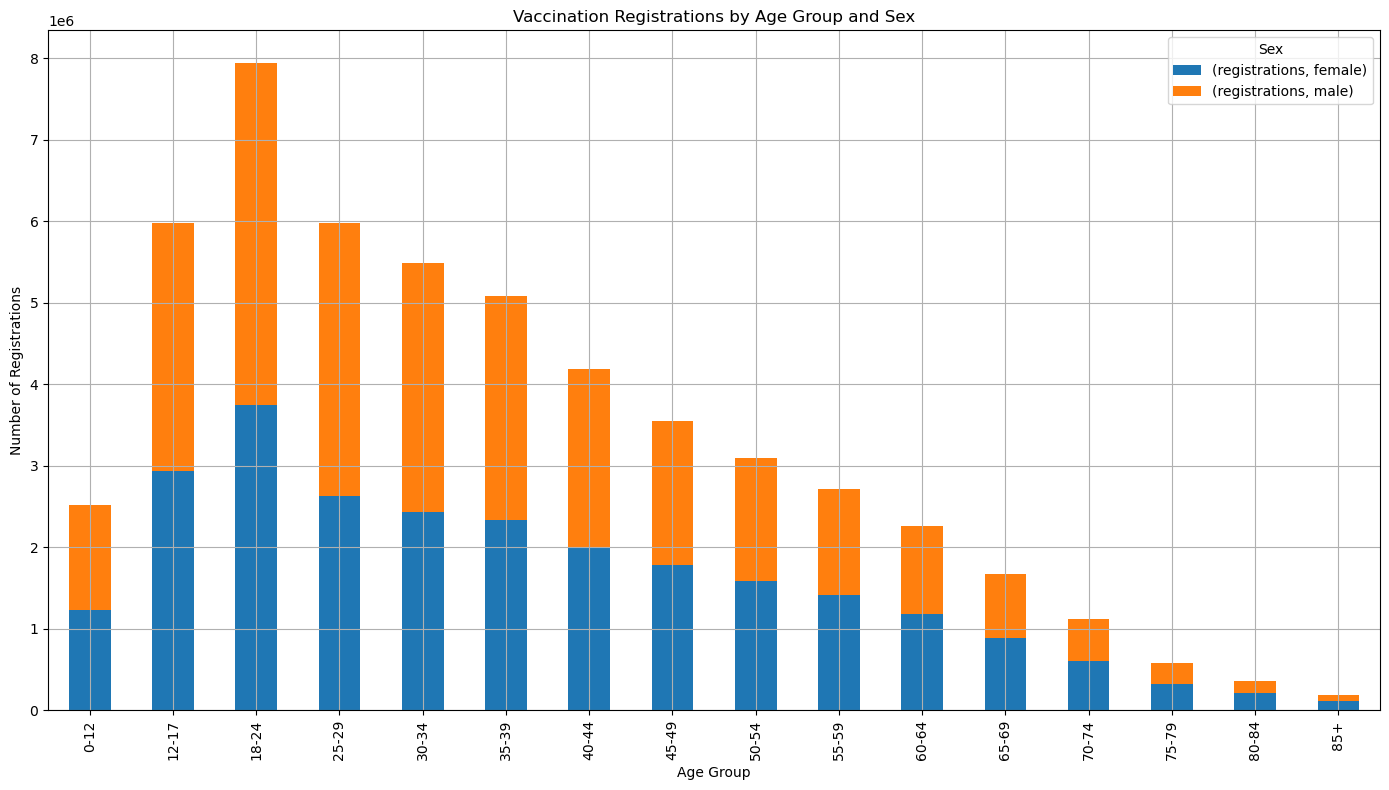

In [17]:
# Group the data by age and sex, summing the registrations
demog_grouped = vaxreg_covid_demog.groupby(['age', 'sex']).sum().unstack()

# Plot the stacked bar chart
demog_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Vaccination Registrations by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Registrations')
plt.legend(title='Sex', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()


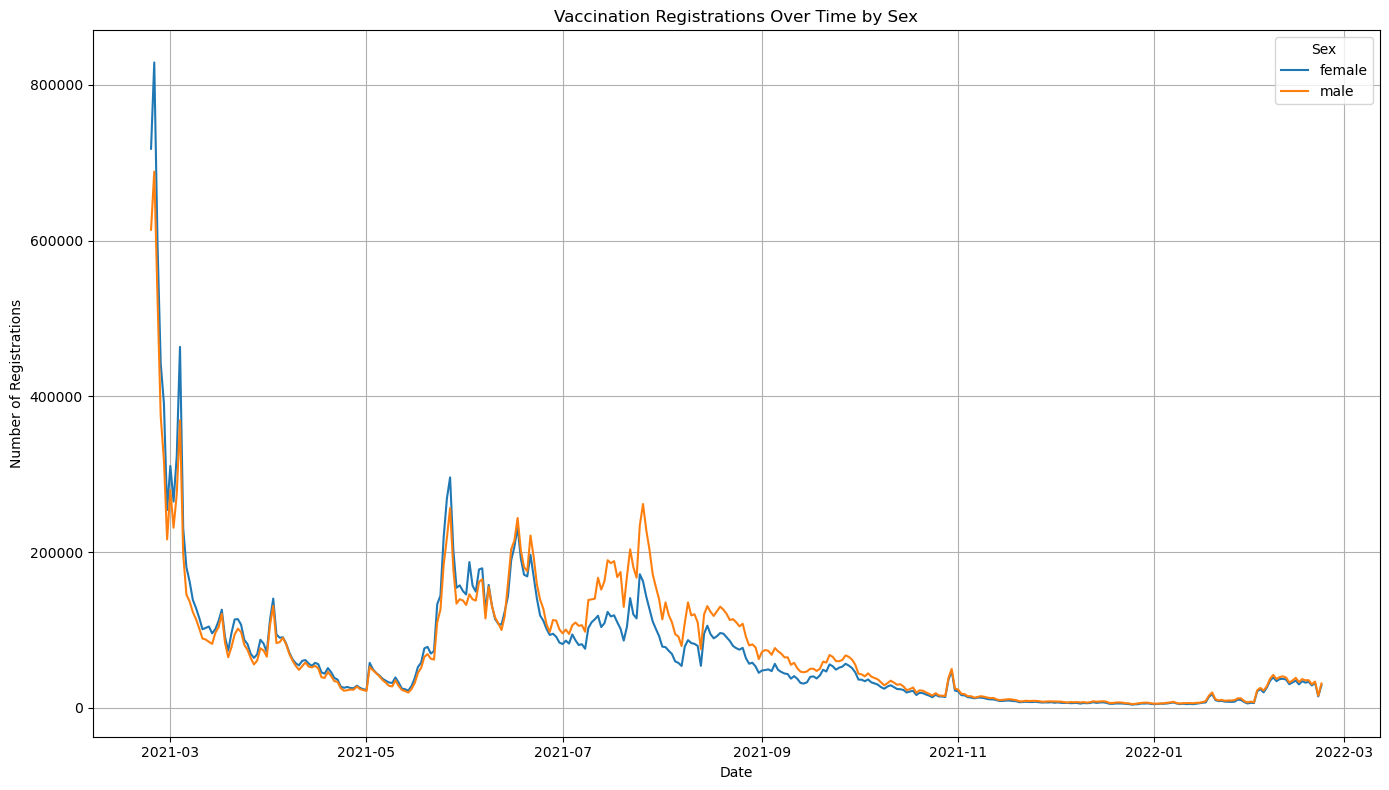

In [18]:
# Group the data by date and sex, summing the registrations
demog_sex_grouped = vaxreg_covid_demog.groupby(['date', 'sex']).sum().unstack()

# Convert the date column to datetime
demog_sex_grouped.index = pd.to_datetime(demog_sex_grouped.index)

# Plot the line plot by sex
plt.figure(figsize=(14, 8))
for sex in demog_sex_grouped['registrations']:
    plt.plot(demog_sex_grouped.index, demog_sex_grouped['registrations'][sex], label=sex)

plt.title('Vaccination Registrations Over Time by Sex')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(title='Sex', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()


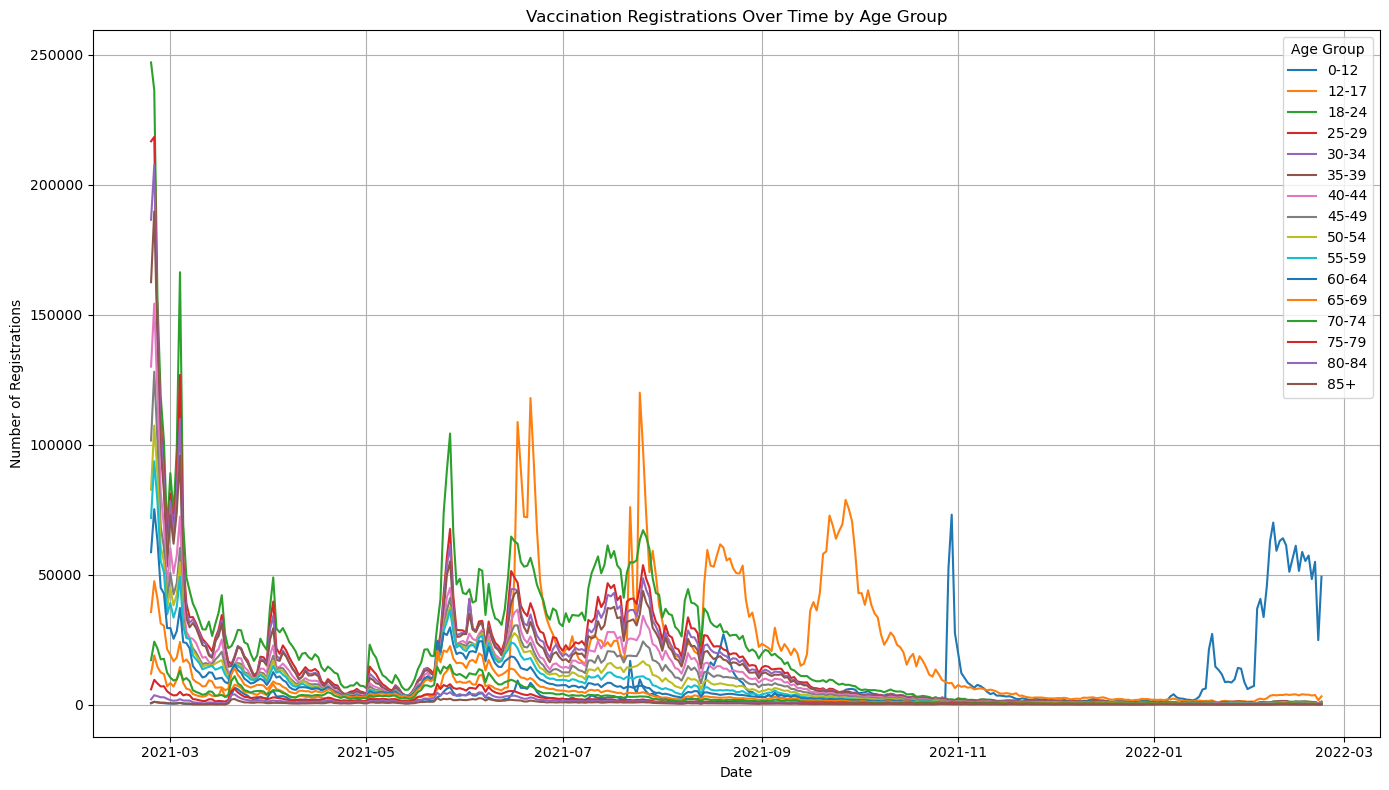

In [19]:
# Group the data by date and age, summing the registrations
demog_age_grouped = vaxreg_covid_demog.groupby(['date', 'age']).sum().unstack()

# Convert the date column to datetime
demog_age_grouped.index = pd.to_datetime(demog_age_grouped.index)

# Plot the line plot by age group
plt.figure(figsize=(14, 8))
for age in demog_age_grouped['registrations']:
    plt.plot(demog_age_grouped.index, demog_age_grouped['registrations'][age], label=age)

plt.title('Vaccination Registrations Over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(title='Age Group', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()


In [20]:
# Load the new datasets
covid_cases = pd.read_csv('covid_cases.csv')
covid_cases_age = pd.read_csv('covid_cases_age.csv')

# Display the first few rows of each dataset
covid_cases_head = covid_cases.head()
covid_cases_age_head = covid_cases_age.head()

covid_cases_head, covid_cases_age_head


(         date     state  cases_new  cases_import  cases_recovered  \
 0  2020-01-25  Malaysia          4             4                0   
 1  2020-01-26  Malaysia          0             0                0   
 2  2020-01-27  Malaysia          0             0                0   
 3  2020-01-28  Malaysia          0             0                0   
 4  2020-01-29  Malaysia          3             3                0   
 
    cases_active  cases_cluster  
 0             4              0  
 1             4              0  
 2             4              0  
 3             4              0  
 4             7              0  ,
          date     state  cases_child  cases_adolescent  cases_adult  \
 0  2020-01-25  Malaysia            0                 0            1   
 1  2020-01-26  Malaysia            0                 0            0   
 2  2020-01-27  Malaysia            0                 0            0   
 3  2020-01-28  Malaysia            0                 0            0   
 4  2020-01-2

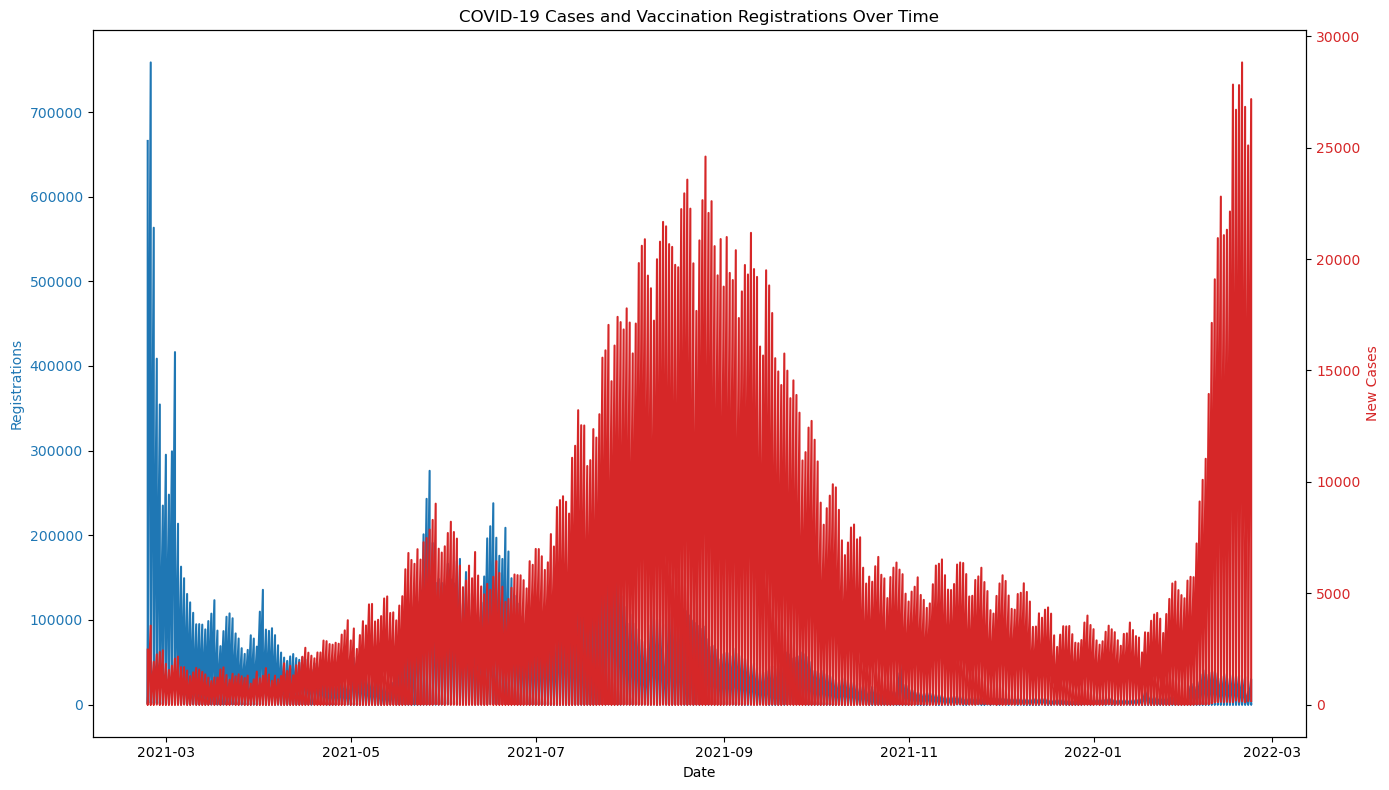

In [21]:
# Convert the date columns to datetime
vaxreg_covid['date'] = pd.to_datetime(vaxreg_covid['date'])
covid_cases['date'] = pd.to_datetime(covid_cases['date'])

# Merge the datasets on date
merged_data = pd.merge(vaxreg_covid, covid_cases, on='date')

# Plot the overlayed line plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot vaccination registrations
ax1.set_xlabel('Date')
ax1.set_ylabel('Registrations', color='tab:blue')
ax1.plot(merged_data['date'], merged_data['registrations'], color='tab:blue', label='Registrations')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the COVID-19 cases
ax2 = ax1.twinx()
ax2.set_ylabel('New Cases', color='tab:red')
ax2.plot(merged_data['date'], merged_data['cases_new'], color='tab:red', label='New Cases')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and show the plot
plt.title('COVID-19 Cases and Vaccination Registrations Over Time')
fig.tight_layout()
plt.show()
